<a href="https://colab.research.google.com/github/Domadrona/Model/blob/main/Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo clasificador

In [2]:
from sklearn.svm import SVC
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

features = np.load('features.npy')
X = features[:,0:-1]
# x=np.array(xl)
y = features[:,-1]
# y=np.array(yl)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [3]:
tic = time.time()
clf = SVC(C=100, gamma=1,kernel='rbf')#SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
svm=classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Duración svm: ',time.time() - tic)
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2))
print("Train",clf.score(X_train, y_train))
print(confusion_matrix(y_test, y_pred))#, labels=["M1", "M2", "M3", "M4", "M5"]

              precision    recall  f1-score   support

         1.0       0.78      0.88      0.82        40
         2.0       0.93      0.88      0.90        42
         3.0       0.87      0.81      0.84        42
         4.0       0.87      0.79      0.83        33
         5.0       0.87      0.96      0.92        28

    accuracy                           0.86       185
   macro avg       0.86      0.86      0.86       185
weighted avg       0.86      0.86      0.86       185

Duración svm:  0.028868675231933594
Accuracy: 85.95
Train 1.0
[[35  1  2  0  2]
 [ 4 37  1  0  0]
 [ 2  2 34  3  1]
 [ 4  0  2 26  1]
 [ 0  0  0  1 27]]


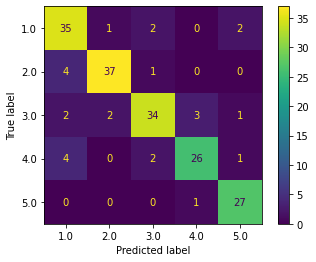

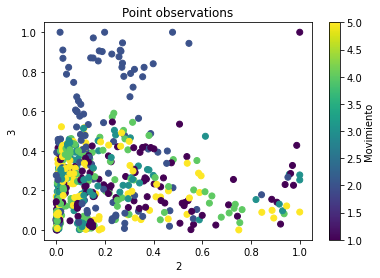

In [35]:
plot_confusion_matrix(clf, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

plt.figure()
plt.scatter(X[:, 2], X[:, 3], c=y) #2,3 3,7
#plt.legend(framealpha=1, frameon=True);
plt.title("Point observations")
plt.xlabel("2")
plt.ylabel("3")
cbar= plt.colorbar()
cbar.set_label("Movimiento", labelpad=+1)